本notebook用于对小图数据进行预处理，得到其平均颜色并存放于一新文件夹中

In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def unpickle(file):
    """cifar10数据官方提供的导入代码"""
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
#设置参数
cifar10_path=r'D:\PythonCode\otherCodes\data\cifar-10-batches-py'
cifar10_file_name=[r'\data_batch_'+str(i) for i in range(1,6)]
cifar10_file_name.append(r'\test_batch')

cifa10_avgcolor_folder=r"D:\PythonCode\otherCodes\data\cifar10-avgcolor"

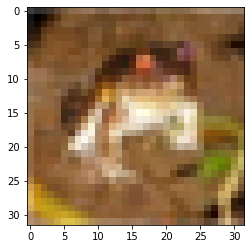

In [4]:
#展示一张示例图
p = 'D:\PythonCode\otherCodes\data\cifar-10-batches-py\data_batch_1'
d = unpickle(p)
 
e = d[b'data']
for i in range(100):
    image = e[i]
    red_image = image[:1024].reshape(32,32)
    green_image = image[1024:2048].reshape(32,32)
    blue_image = image[2048:].reshape(32,32)
    result_img = np.ones((32, 32, 3), dtype=np.uint8)
    result_img[:,:,0] = red_image
    result_img[:,:,1] = green_image
    result_img[:,:,2] = blue_image
    plt.imshow(result_img)
    break

In [27]:
%%time
#遍历所有图片，计算其平均RGB颜色，将其分别存储至对应文件中
for file_name in cifar10_file_name:  #遍历所有batch
    cifar10_batch=cifar10_path+file_name  #该batch对应的路径
    cifar10_batch_unpickle=unpickle(cifar10_batch)
    file_r=open(cifa10_avgcolor_folder+"\\"+file_name+'_r',mode='w')
    file_g=open(cifa10_avgcolor_folder+"\\"+file_name+'_g',mode='w')
    file_b=open(cifa10_avgcolor_folder+"\\"+file_name+'_b',mode='w')
    for picture in cifar10_batch_unpickle[b'data']:
        file_r.write(str(np.mean(picture[:1024]))+'\n')
        file_g.write(str(np.mean(picture[1024:2048]))+'\n')
        file_b.write(str(np.mean(picture[2048:]))+'\n')
    file_r.close()
    file_g.close()
    file_b.close()

Wall time: 2.04 s
